# Module 3.1 Numerical Integration (1 of 2)

Throughout physics we encounter the need to evaluate integrals. 
For example, work is the line integral of a force along a path, Gauss' law relates the surface
integral of the electric field to the enclosed charge, the action is the integral of the Lagrangian,
_etc_. 

## Learning objectives:
* Be able to numerically compute an integral using left/right/midpoint methods.
* Make an assessment of the accuracy of the integral and plot the error as a function of the number of intervals

# Pre-class

Remind yourself of Reimann sums, either through your calculus textbook and/or this [video](https://youtu.be/rfG8ce4nNh0)

Download the PDF of [TAK](https://catalog.lib.ncsu.edu/record/NCSU4441969) and read Sec 3.3, up to at least page 53. You will probably find it helpful to read along using a paper/pencil, and/or be able to draw on your PDF.


# In-class


## Preliminary: computing sums

As part of this section, we'll need to know how to compute some sums.  Recall that there are a few ways of doing that.  Recall that we computed the sum of an array of numbers `xarray` using:

    # ################################################
    # For loop type 1
    
    # Prepare a variable to store the sum
    mysum=0
    
    # Loop over indices
    for i in range(len(xarray)):
        mysum = mysum + xarray[i]
        
    # ################################################
    # For loop type 2 
    # Prepare a variable to store the sum
    mysum=0
    
    # Loop over values
    for x in xarray:
        mysum = mysum + x
    
    # ################################################
    # No loops -- use the built-in `sum` function
    mysum = np.sum( xarray )
    
If you're ever confused about what a numpy function does, Google is your friend:
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.sum.html. Although the documentation may be somewhat overwhelming at times, there is usually a simple example or two at the bottom of the page.

**Exercise**: Compute the sum of the numbers ``1.0`` through ``10.0`` (inclusive) separated by ``1`` using all three the methods above.  You'll need to generate the `xarray`.  Print it before you sum, just to make sure you have it right.

In [2]:
# Method 1
xarray = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(xarray)

# For loop type 1
# Prepare a variable to store the sum
mysum=0
    
# Loop over indices
for i in range(len(xarray)):
    mysum = mysum + xarray[i]

print(mysum)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
55


In [3]:
# Method 2
# For loop type 2 
# Prepare a variable to store the sum
mysum=0
    
# Loop over values
for x in xarray:
    mysum = mysum + x

print(mysum)

55


In [4]:
# Method 3
import numpy as np
# No loops -- use the built-in `sum` function
mysum = np.sum( xarray )

print(mysum)

55


## Rectangle Methods


The integral of a function is the "area under the curve". (This is the case for most functions we encounter in 
physics. Some exotic functions require a more sophisticated definition of the integral.) The area under the 
curve $f(x)$ from $x=a$ to $x=b$ can be approximated as the sum of the areas of the rectangles shown in the figure:

![Integration rectangles](https://upload.wikimedia.org/wikipedia/commons/e/ea/Integration_rectangle.png)

The rectangles are formed by dividing the interval $[a,b]$ into $N$ subintervals, from $[x_0,x_1]$, to 
$[x_{N-1},x_N]$. (Note that $x_0 = a$ and $x_N = b$.) The height of each rectangle is the value of the function 
at some point $\bar x_i$ within the subinterval
$[x_{i-1},x_i]$. The area of the $i$th rectangle is the product of the height $f(t_i)$ and the width $x_{i} - x_{i-1}$. 
Then the integral 

$$
I = \int_a^b f(x)\, dx
$$

is approximated by the sum of the areas of the rectangles:

$$
I \approx \sum_{i=0}^{N-1} f(\bar x_i)\,(x_i - x_{i-1})
$$

This approximation is called the Riemann sum. The exact value for $I$ is obtained by taking the limit $N\to \infty$.

In practice we must choose where to place the $x_i$'s and  $\bar x_i$'s before using the Riemann sum to 
approximate the integral $I$. Different choices lead to different numerical integration methods.
The simplest choice for the $x_i$'s is to make them equally spaced between the endpoints. That is, 
let $h = (b-a)/N$ denote the width of each subinterval, with

$$
x_i = a + ih
$$

for $i = 0,\ldots N-1$. There are three obvious choices for the $\bar x_i$'s:

1) With $\bar x_i = x_{i} = a + ih $, the height of each rectangle 
is the value of the function at the left side of the subinterval. This yields the _left endpoint rule_ approximation to $I$:

$$
I_L =  \sum_{i=0}^{N-1} f(a + ih) \, h
$$

2) With $\bar x_i = x_{i+1} = a + (i+1)h$, the height of each rectangle is the value of the function at the right side of the subinterval. This 
is the _right endpoint rule_

$$
I_R =  \sum_{i=0}^{N-1} f(a + (i+1)h) \, h
$$

3) With $\bar x_i = (x_i + x_{i+1})/2 = a + ih +h/2$, the height of each rectangle is the value of the 
function at the midpoint of the subinterval. This yields 

$$
I_M =  \sum_{i=0}^{N-1} f(a + (i+1/2)h) \, h
$$

which is called the "midpoint rule". 

Exercise
----------
Write a code to integrate the function $f(x) = \sin x$ between $a=0$ and $b=\pi/2$ using both 
the left and right endpoint rules. Structure your code so that it's easy to change $f(x)$, $a$, $b$, and the 
number of subintervals $N$. I suggest that you make a function of the form:

    def leftpoint(f, a, b, N):

where you may pass in the function `f` (defined elsewhere), and the variables `a`, `b` and `N`.

Compare your results of left/right endpoint to each other, and to the correct value.
Your results should become more accurate as you increase the number of subintervals $N$. 

In [5]:
# Hint: for development/debugging,
# you may want to pick a set of $x_i$ that you know.  Print them to the screen to 
# ensure you know that x-axis is correct. For example, a=1, b=2, N = 10.

a = 0
b = np.pi/2
N = 50
def f(x): 
    return np.sin(x)

def leftpoint(f,a,b,N):
    dx = (b-a) / N   # Width
    x = np.linspace(a,b-dx,N)
        # Used ChatGPT to come up with this function: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace
    return np.sum(f(x)) * dx

def rightpoint(f,a,b,N):
    dx = (b-a) / N   # Width
    x = np.linspace(a+dx,b,N)
        # Used ChatGPT to come up with this function: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace
    return np.sum(f(x)) * dx
        # The internet says that, if I have a set of x values defined already (I do), then f(x) evaluates inself for each x value. These evaluations are stored in f(x) like an array. 
    

lresult=leftpoint(f, a, b, N)
print("The result of the integral for ",N," leftpoint intervals is",lresult)

rresult=rightpoint(f, a, b, N)
print("The result of the integral for ",N," rightpoint intervals is",rresult)


The result of the integral for  50  leftpoint intervals is 0.9842097886757729
The result of the integral for  50  rightpoint intervals is 1.0156257152116708


### Comment 
The 'N' can be changed, as it increases, the result approaches 1. The left side approx. is lower than 1 and the right side approx is greater than 1. 

You may notice that the answer is not exactly close to the real answer.  Let's investigate how poorly we're doing.  We can do this here by computing the integral for a variable number of intervals ($N_1, N_2, N_3, ...$).  Suppose we do this for $m$ intervals.  We'll need some storage space, and to compute the integral for each $N_m$.

Exercise
--------
Compute the integral of $sin(x)$ from $x=0$ to $x=\pi/2$ using the leftpoint rule using $N=2,4,8,16,32,64,128,256,512,1024$.  Make a plot of the answer as a function of $N_m$.

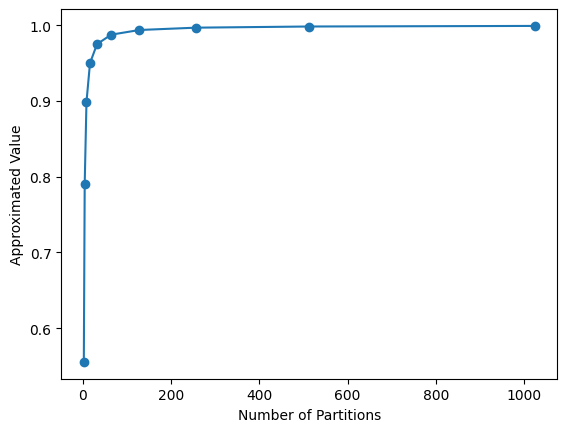

In [6]:
import pylab as py

Nlist = [2,4,8,16,32,64,128,256,512,1024]
anslist = np.zeros(len(Nlist))
    # https://stackoverflow.com/questions/63937664/match-length-of-arrays-in-python
    # https://www.geeksforgeeks.org/python/how-to-create-an-array-of-zeros-in-python/

# Note the use of `enumerate` here.  We'll want to store the result in a
# different array than the one we're looping over, so `enumerate`
# makes sense.
for iN, N in enumerate(Nlist):
    anslist[iN] = leftpoint(f, a, b, N) # Evaluate the integral using the function you defined

py.plot(Nlist, anslist,'o-')
py.xlabel('Number of Partitions')
py.ylabel('Approximated Value')
py.show()

Eventually, for large N, it looks like we approach the right answer.  It's somewhat hard to see exactly how
close we get on these scales,
so let's adjust.  Make a plot of $\log(|$calculated answer - real answer$|)$ vs $\log(N_m)$. $|x|$ indicates the absolute value of $x$, and it's implemented in `numpy` as `numpy.abs()`.

_Question:_ Which base is the logarithm computed in?  How could you change it?  (Google is your friend)

_Note:_ you can probably re-use your array of answers from above!

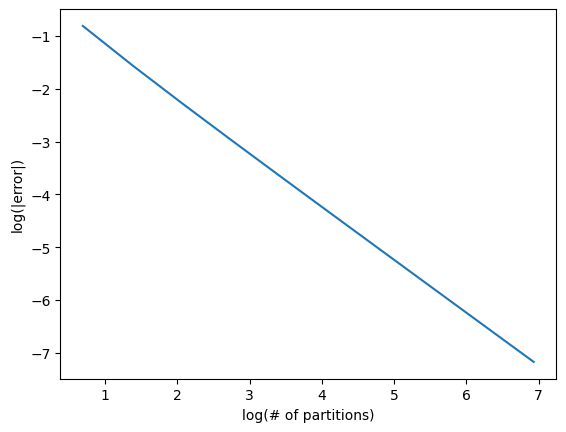

In [7]:
py.plot(np.log(Nlist), np.log(np.abs(anslist - 1)))
py.xlabel('log(# of partitions)')
py.ylabel('log(|error|)')
py.show()

If all went well, you got a straight line.  What is the slope?      (Answer: Slope is -1)

Intuitively, we expect the midpoint rule to give a better approximation to the area under the curve than the left or right 
endpoint rules. 

# Post-class

If you didn't make it to the end (that's fine!), the remaining exercises (above) are to be completed on your own time, so that you are ready to start Module 3.2 which picks up where this one left off. Because these two modules work together, you will benefit most from Module 3.2 if you have draft versions of HW 3.1 and 3.2 (below) done beforehand.

If you feel like you can't make it the rest of the way through on your own, please get HELP! from the instructors or your groupmates or on the Forum.

If you make it to the end of the Module before the end of class: great! You have time to start work on the homework problems for this module. 

## Homework 3.1 (JHub + $\LaTeX{}$)

a) Write a function `midpoint` which integrates a function `f` from $a$ to $b$, using $N$ intervals. This function will take the form:
* Input: f,a,b,N
* Output: the integration

For this problem, JHub nbgrader will auto-check that your `midpoint` function generates the correct output. You will need to have the exact input/output specified in this problem. Please also include a copy of your code in your $\LaTeX{}$ writeup.

b) For the definite integral of $f(x) = \sin x$ from $a$ to $b$  from $a=0$ and $b=\pi/2$, compute the error for $N = 2,4,8,16,32, 64, 128, 256$ and make a log-log plot of the absolute value of the error versus $N$. 

c) The error is proportional to some power of $N$. What is that power? 

d) **On the same plot**, show the results from the leftpoint integration  (Make sure to properly label the figure!). Hint: you can just change the name of the function call from `midpoint` to `leftpoint`, and rerun the same code! Include a copy of your `leftpoint` code in your $\LaTeX{}$ writeup.  

e) Which method is better?  And, how much better?

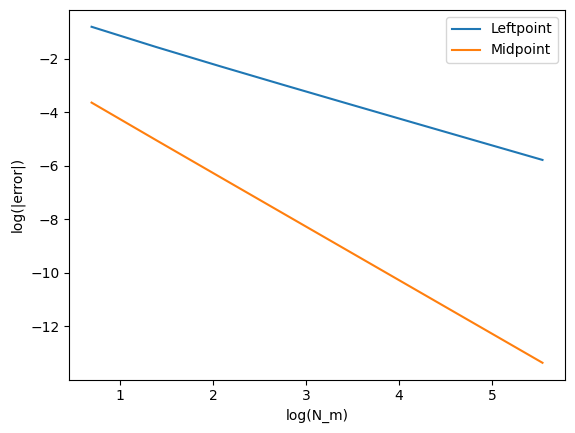

In [8]:
# Functions
def leftpoint(f, a, b, N):
    dx = (b-a) / N
    x = np.linspace(a, b - dx, N) 
    return np.sum(f(x)) * dx
def midpoint(f, a, b, N):
    dx = (b-a) / N
    x = np.linspace(a + dx/2, b - dx/2, N) 
    return np.sum(f(x)) * dx
def f(x):
    return np.sin(x)


# Variables
a = 0
b = np.pi/2
Nlist = [2,4,8,16,32,64,128,256]


# Error
left_error = np.zeros(len(Nlist))
mid_error = np.zeros(len(Nlist))    # create an empty array that will store the error values

for i, N in enumerate(Nlist):   # starts a loop that will enter the errors for each N_m
    left_error[i] = np.abs( leftpoint(f, a, b, N) - 1 )   # '-1' because 1 is the exact answer of the integral
    mid_error[i] = np.abs( midpoint(f, a, b, N) - 1 )   # '-1' because 1 is the exact answer of the integral


# Plot
py.plot(np.log(Nlist), np.log(np.abs(left_error)), label='Leftpoint')
py.plot(np.log(Nlist), np.log(np.abs(mid_error)), label='Midpoint')
py.xlabel('log(N_m)')
py.ylabel('log(|error|)')
py.legend()
py.show()

### 3.1 Answers
The slope of the midpoint approximation is about -2, which corresponds to a relationship of N^-2 
The slope of the leftpoint approximation is about -1, which corresponds to a relationship of N^-1 

The midpoint approximation is better. Much better. Twice as good? The mathematical quantification is above. The logical explanation is that the midpoint approximation starts off 1,000 times better than the leftpoint. As N_m increases, that performance gap only grows. 

## Homework 3.2 ($\LaTeX{}$)

a) Use the midpoint rule to evaluate the integral 
    
$$
I =  \int_0^{100} \sin(x^2)\,dx
$$

b) Make a table showing $N$ and $I$ for increasing values of $N$. We may consider a value accurate to a certain number of digits if the answer doesn't change when you increase $N$. **Hint:** Plot the function on the array you're planning on evaluating the integral on to see whether you capture what the function is doing.

c) Approximately how many subintervals are required for your answer to be accurate to 3 significant figures? 4 significant figures? 5 significant figures? How did you decide this?

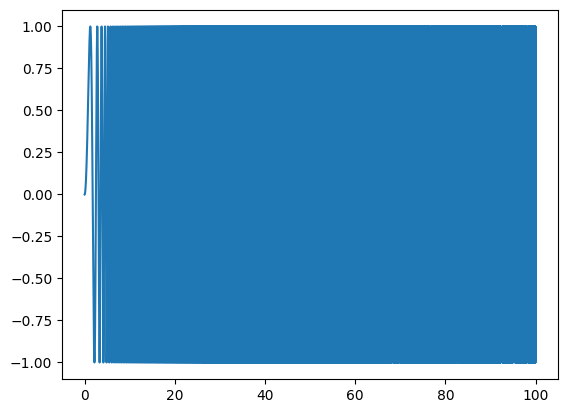

The approximated value (to 3 sig figs) was 0.631
Approximately  12170  subintervals were needed to obtain an approximation accurate to  3  significant figures.
The approximated value (to 4 sig figs) was 0.6314
Approximately  31370  subintervals were needed to obtain an approximation accurate to  4  significant figures.
The approximated value (to 5 sig figs) was 0.63141
Approximately  196370  subintervals were needed to obtain an approximation accurate to  5  significant figures.


Table of N vs I:
______________________________
N       |   I
______________________________
10010 	| 0.632312813942872
10020 	| 0.6323107996064292
10030 	| 0.632308792309527
10040 	| 0.6323067920175142
10050 	| 0.6323047986975405
10060 	| 0.6323028123158396
10070 	| 0.6323008328394912
10080 	| 0.6322988602351556
10090 	| 0.6322968944710569
10100 	| 0.6322949355135712
10110 	| 0.6322929833301042
10120 	| 0.6322910378896747
10130 	| 0.6322890991593983
10140 	| 0.6322871671076131
10150 	| 0.632285241703794
1016

In [ ]:
# Extra. Variables, functions, constants....
progress = 0        # I need this to track where I am in in my loop
N       = 100000    # Number of subintervals
sigFig3 = 3 
sigFig4 = 4
sigFig5 = 5
smallN  = 10000     # Starting number of N
bigN    = 500000    # Largest number of N
step    = 10        # Increase N by this number for the next N
curr    = 0         # Holds value of the current approximation
def truncate(x, sigfig):                                # Need this later to compare 
    return np.trunc(x * 10**sigfig) / (10**sigfig)      # This makes x.abcdefghi -> x.abc.
    # x.abcdefghi * 10^3 = xabc.defghi  ->  xabc.0000 -> x.abc

# (A)
def midpoint(f, N):
    dx = (100) / N
    x = np.linspace(0 + dx/2, 100 - dx/2, N) 
    return np.sum(f(x)) * dx
def f(x):
    return np.sin(x**2)

# (B)
x = np.linspace(0, 100, N)
py.plot(x, np.sin(x**2))
py.show()

# I will make an array of the values to print in a table later
N_table = []
I_table = []

# (C)
# The subinterval requirement is determined by when a sig fig stops changing for increased N. 
# I will do a loop that increases the number of subintervals until the approx reaches an accuracy of ___ sig figs
N = smallN
while N <= bigN:        # There are no do-while loops in python apparently, so I will use a break statement with the ifs
    curr = midpoint(f, N)

    # I will quickly store the values that I need to print in the table later
    N_table.append(N)
    I_table.append(curr)

    if progress == 0:       # This is needed because the first time around, there is no prev to compare the new thing to
        if (truncate(0.63141793, sigFig3) == truncate(curr, sigFig3)):    # What I need here is a comparison between prev and curr to see if they share accuracy out to a certain number of decimal points. If they do, then increasing subintervals will only improve accuracy passed the currrent sig fig. 
        # I asked ChatGPT if there was a function that could cut off decimals, it showed me np.trunc. That is when I built the truncate function
            print("The approximated value (to 3 sig figs) was",truncate(curr, sigFig3))
            print("Approximately ",N," subintervals were needed to obtain an approximation accurate to ",sigFig3," significant figures." )
            progress = 1
            step = 100      # I up the step because it gets harder to get more accurate
    if progress == 1:       # If we finished finding I out to 3 sig figs...
        if (truncate(0.63141793, sigFig4) == truncate(curr, sigFig4)):
            print("The approximated value (to 4 sig figs) was",truncate(curr, sigFig4))
            print("Approximately ",N," subintervals were needed to obtain an approximation accurate to ",sigFig4," significant figures." )
            progress = 2
            step = 1000     # Same reason here, gets much harder to get accurate
    if progress == 2:       # If we finished finding I out to 4 sig figs...
        if (truncate(0.63141793, sigFig5) == truncate(curr, sigFig5)):
            print("The approximated value (to 5 sig figs) was",truncate(curr, sigFig5))
            print("Approximately ",N," subintervals were needed to obtain an approximation accurate to ",sigFig5," significant figures." )
            progress = 3
            break

    prev = curr
    N = N + step

# Print out the table
print("\n\nTable of N vs I:\n______________________________")
print("N       |   I\n______________________________")
for i in range(1, len(N_table)):
    print(N_table[i], "\t|", I_table[i])

### 3.2 Answer
The number of intervals was decided by comparing the approx to a high-N approx (about 0.6314198). If they matched oout to a certain decimal point, then that is how many subintervals were needed to get an accuracy out to that decimal. Once the approx was accurate out to that decimal, it would no change any further, meaning it would match the next approx.

# Acknowledgements

This module was developed by Karen Daniels at NCSU for PY251.